In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import dates as mpl_date
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("CPU.csv")

In [3]:
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [4]:
df.head(10)

,Time,Time_Elapsed,CPU_Precentage
0,04:18:35,0.101619,38.5
1,04:18:35,0.303596,22.5
2,04:18:36,0.507279,19.5
3,04:18:36,0.708261,22.5
4,04:18:36,0.909353,17.5
5,04:18:36,1.110466,50.0
6,04:18:36,1.311423,27.5
7,04:18:37,1.513453,87.2
8,04:18:37,1.714719,83.7
9,04:18:37,1.923213,78.6


In [5]:
df.describe()

,Time_Elapsed,CPU_Precentage
count,125501.000000,125501.000000
mean,12970.533870,19.507065
std,7479.023695,22.063576
min,0.101619,2.400000
25%,6502.351799,9.800000
50%,12970.002852,12.200000
75%,19454.696844,16.700000
max,25921.115942,100.000000


In [6]:
dfH = []
dfm = []
dfs = []
for index, row in df.iterrows():
    timestamp = row['Time']
    H,m,s = timestamp.split(':')
    dfH.append(H)
    dfm.append(m)
    dfs.append(s)

df['H'] = dfH
df['m'] = dfm
df['s'] = dfs

print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,Time,Time_Elapsed,CPU_Precentage,H,m,s
0,04:18:35,0.101619,38.5,04,18,35
1,04:18:35,0.303596,22.5,04,18,35
2,04:18:36,0.507279,19.5,04,18,36
3,04:18:36,0.708261,22.5,04,18,36
4,04:18:36,0.909353,17.5,04,18,36
...,...,...,...,...,...,...
125496,11:30:35,25920.309742,7.5,11,30,35
125497,11:30:36,25920.511587,10.0,11,30,36
125498,11:30:36,25920.712685,15.4,11,30,36
125499,11:30:36,25920.915095,15.0,11,30,36


In [7]:
Time = []
for index, row in df.iterrows():
    Time.append(row['H']+':'+row['m']+':'+row['s'])

newDF = pd.DataFrame()
newDF['Time'] = Time
newDF['CPU_Precentage'] = df['CPU_Precentage']
newDF['Time'] = pd.to_datetime(newDF['Time'])
newDF

<ipython-input-7-47720ab77c2c>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  newDF['Time'] = pd.to_datetime(newDF['Time'])


,Time,CPU_Precentage
0,2024-06-22 04:18:35,38.5
1,2024-06-22 04:18:35,22.5
2,2024-06-22 04:18:36,19.5
3,2024-06-22 04:18:36,22.5
4,2024-06-22 04:18:36,17.5
...,...,...
125496,2024-06-22 11:30:35,7.5
125497,2024-06-22 11:30:36,10.0
125498,2024-06-22 11:30:36,15.4
125499,2024-06-22 11:30:36,15.0


In [8]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=1c8f1a669b2a6315f1474837a32a274fd170eee8c294e527824a49f80c90fcab
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [9]:
from pandasql import sqldf

In [10]:
sql = lambda q: sqldf(q, globals())
newDF = sqldf("SELECT * FROM newDF WHERE Time BETWEEN '2024-06-22 04:18:35	' AND '2024-06-22 04:19:01'")
newDF

,Time,CPU_Precentage
0,2024-06-22 04:18:35.000000,38.5
1,2024-06-22 04:18:35.000000,22.5
2,2024-06-22 04:18:36.000000,19.5
3,2024-06-22 04:18:36.000000,22.5
4,2024-06-22 04:18:36.000000,17.5
...,...,...
119,2024-06-22 04:19:00.000000,87.8
120,2024-06-22 04:19:00.000000,85.0
121,2024-06-22 04:19:00.000000,78.0
122,2024-06-22 04:19:00.000000,90.2


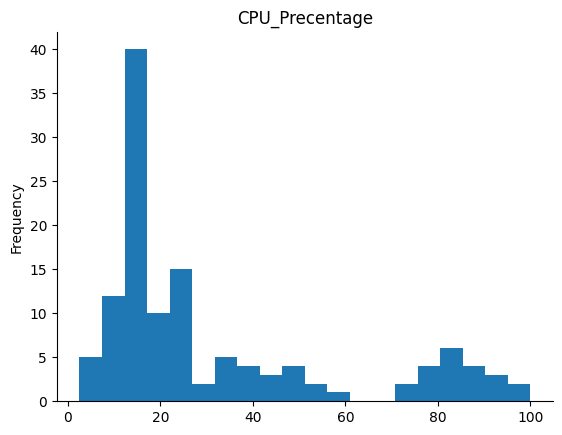

In [14]:
# @title CPU_Precentage

from matplotlib import pyplot as plt
newDF['CPU_Precentage'].plot(kind='hist', bins=20, title='CPU_Precentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

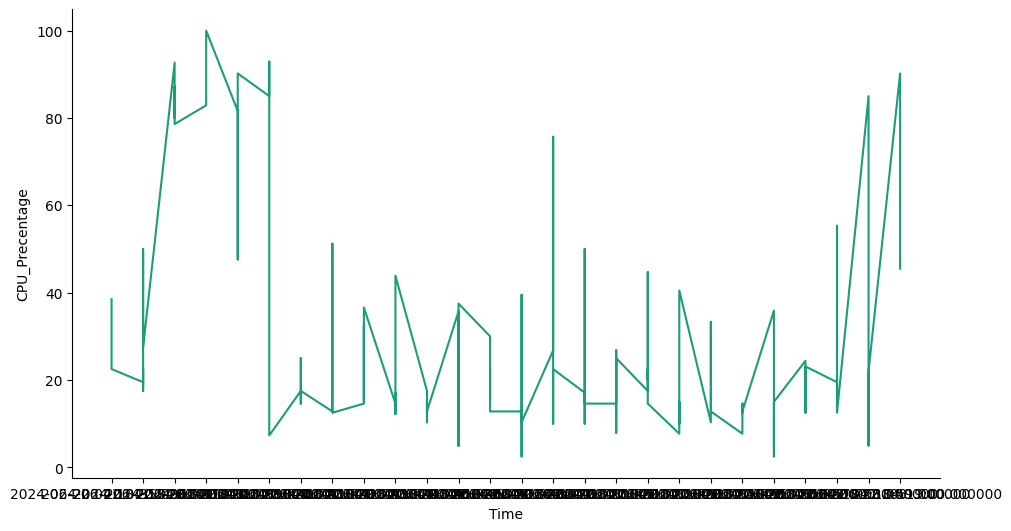

In [13]:
# @title Time vs CPU_Precentage

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['CPU_Precentage']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = newDF.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('CPU_Precentage')

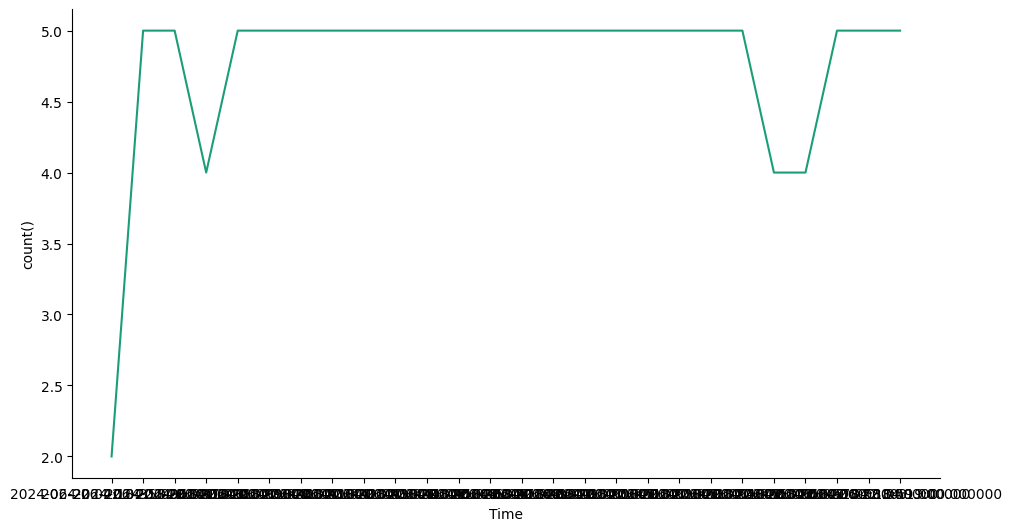

In [12]:
# @title Time vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Time'}, axis=1)
              .sort_values('Time', ascending=True))
  xs = counted['Time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = newDF.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('count()')

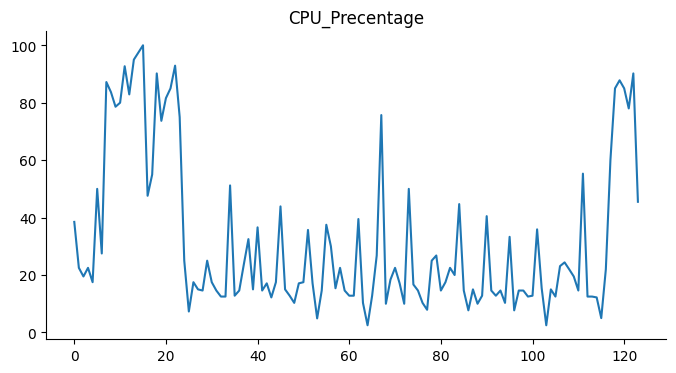

In [11]:
# @title CPU_Precentage

from matplotlib import pyplot as plt
newDF['CPU_Precentage'].plot(kind='line', figsize=(8, 4), title='CPU_Precentage')
plt.gca().spines[['top', 'right']].set_visible(False)